In [1]:
import statsmodels.api as sm
import yfinance as yf
import pandas as pd
import numpy as np
import numpy_financial as npf
import matplotlib.pyplot as plt

In [2]:
stocks = ["AAPL", "AMZN", "MSFT", "TSLA"]

stocks_data = yf.download(stocks, start="2018-01-01")

[*********************100%***********************]  4 of 4 completed


In [3]:
# daily return 

data = stocks_data['Close']

x = data.pct_change()
print(x)

                AAPL      AMZN      MSFT      TSLA
Date                                              
2018-01-02       NaN       NaN       NaN       NaN
2018-01-03 -0.000174  0.012775  0.004654 -0.010233
2018-01-04  0.004645  0.004476  0.008801 -0.008290
2018-01-05  0.011385  0.016163  0.012398  0.006230
2018-01-08 -0.003714  0.014425  0.001020  0.062638
...              ...       ...       ...       ...
2022-01-03  0.025004  0.022118 -0.004668  0.135317
2022-01-04 -0.012692 -0.016916 -0.017147 -0.041833
2022-01-05 -0.026600 -0.018893 -0.038388 -0.053471
2022-01-06 -0.016693 -0.006711 -0.007902 -0.021523
2022-01-07  0.000988 -0.004288  0.000510 -0.035447

[1013 rows x 4 columns]


In [7]:
p_weights = []
p_returns = []
p_risk = []
p_sharpe = []

In [8]:
# generating random weights for each of the stocks
wts = np.random.uniform(size = len(x.columns))

# normalising the weights so the sum of the random weights is equal to 1
wts = wts / np.sum(wts)

In [9]:
# 500 portfolios
count = 500 

for k in range(0, count): 
    wts = np.random.uniform(size = len(x.columns)) 
    wts = wts/np.sum(wts) 
    p_weights.append(wts) 

    #returns 
    mean_ret = (x.mean() * wts).sum()*252 
    p_returns.append(mean_ret) 

    #volatility 
    ret = (x * wts).sum(axis = 1) 
    annual_std = np.std(ret) * np.sqrt(252) 
    p_risk.append(annual_std) 

    #Sharpe ratio 
    sharpe = (np.mean(ret) / np.std(ret))*np.sqrt(252) 
    p_sharpe.append(sharpe)

In [10]:
# finding the index of the portfolio with the maximum Sharpe ratio 
max_ind = np.argmax(p_sharpe)

# max Sharpe ratio
print(p_sharpe[max_ind])

# weights 
print(p_weights[max_ind])

1.575911908767426
[0.26435608 0.01607112 0.36826293 0.35130987]


<AxesSubplot:>

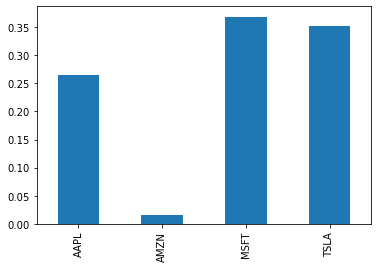

In [11]:
# visualising the weights 

s = pd.Series(p_weights[max_ind], index=x.columns)
s.plot(kind="bar")

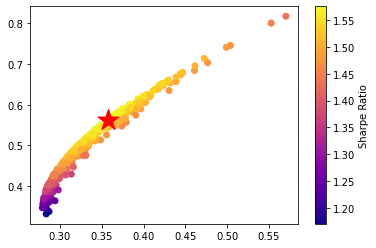

In [12]:
# plotting all 500 portfolios now - The Efficient Frontier

plt.scatter(p_risk, p_returns, c=p_sharpe, cmap='plasma') 
plt.colorbar(label='Sharpe Ratio') 

# red star marker to show the most efficient portfolio with the best Sharpe ratio 
plt.scatter(p_risk[max_ind], p_returns[max_ind], color='r', marker='*', s=500) 
plt.show()